# Assignment-4 : Clustering Analysis

In [ ]:
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image
import seaborn as sns
from pathlib import Path
import random
import cv2 as cv

In [ ]:
breed_paths =  [
    'Images/n02093256-Staffordshire_bullterrier/',
    'Images/n02111277-Newfoundland/',
    'Images/n02113023-Pembroke/',
    'Images/n02115641-dingo/'
]
# Check if each folder exists and count image files
images=[]
image_path =[]
labels=[]
for folder_path in breed_paths:
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                file_path = os.path.join(folder_path, file)
                image_path.append(file_path)
                img=cv.imread(file_path)
                images.append(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
                name = folder_path.split('/')
                labels.append(name[1].split('-')[1])

print(f"Names of Breeds: {set(labels)}")

Names of Breeds: {'dingo', 'Staffordshire_bullterrier', 'Newfoundland', 'Pembroke'}


1. (Feature Extraction)
• Resize each cropped image to a 224 × 224 pixel image. (Similar to Assignment 1 Question
2(a))
• Normalize the resized image dataset.
• Extract features for each image from the last convolution layer of “ResNet18” (You can follow
https://kozodoi.me/blog/20210527/extracting-features. But you must reference
this website in your solution) (2.5 points)


In [ ]:
import skimage.transform
resize_image = []
for img in images:
    resize_image.append(skimage.transform.resize(img, (224, 224)))
img_resize = np.array(resize_image)
df_size = img_resize.shape[0]
image_arr = img_resize.reshape(df_size,-1)

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(image_arr)

2. (Dimension Reduction) Perform dimension reduction on your new dog image representation dataset
to reduce the dimension to 2 (similar to Assignment 1 Question 2(f)). (0.5 points)


In [ ]:
#Dimensionality Reduction
dog_images_paths = [
    'Images/n02093256-Staffordshire_bullterrier/',
    'Images/n02111277-Newfoundland/'
]

# Function to load images, convert to grayscale, compute histograms, and normalize
def process_images(image_paths):
    images = []
    for path in image_paths:
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  # Read image in grayscale
            if img is not None:
                # Compute the histogram
                hist = cv.calcHist([img], [0], None, [256], [0, 256])
                # Normalize the histogram
                hist = hist / np.sum(hist)
                images.append(hist.flatten())  # Flatten the histogram
    return np.array(images)

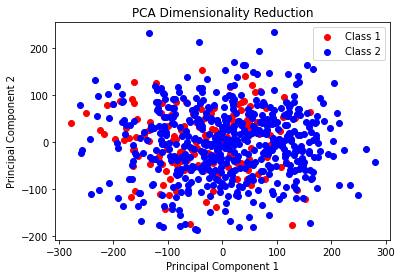

In [ ]:
from sklearn.decomposition import PCA

# Process images for the two classes
class_1_images = process_images([dog_images_paths[0]])
class_2_images = process_images([dog_images_paths[1]])

# Combine the two classes into a single dataset
dataset = np.vstack((class_1_images, class_2_images))


# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)

# Plot the 2D points with different colors for the two classes
plt.scatter(reduced_data[:len(class_1_images), 0], reduced_data[:len(class_1_images), 1], label='Class 1', c='red')
plt.scatter(reduced_data[len(class_1_images):, 0], reduced_data[len(class_1_images):, 1], label='Class 2', c='blue')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Dimensionality Reduction')
plt.show()


3. (Clustering Algorithm) Perform clustering using the following approaches on the 2D dataset you
preprocessed in Item 2:<br>
• K-mean clustering and its variants for 𝐾 = 4:<br>
(a) K-means clustering: (Use KMeans with init = ‘Random’) (0.5 point)<br>
(b) KMeans with init=‘k-means++’ (0.5 point)<br>
(c) Bisecting K-means (sklearn.cluster.BisectingKMeans with init = ‘Random’) (0.5 point)<br>
(d) spectral clustering (sklearn.cluster.SpectralClustering with default parameters) (0.5 point)<br>


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters = 4,init = 'random')
kmeans.fit(x)
y =  kmeans.predict(x)
print(f"fowlkes_mallows_score :{fowlkes_mallows_score(labels, y)}")
print(f"silhouette_score :{silhouette_score(x, kmeans.labels_)}")

C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


fowlkes_mallows_score :0.292227777070153
silhouette_score :0.06839236313754889


In [ ]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++')
kmeans.fit(x)
y =  kmeans.predict(x)
print(f"fowlkes_mallows_score :{fowlkes_mallows_score(labels, y)}")
print(f"silhouette_score :{silhouette_score(x, kmeans.labels_)}")

C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


fowlkes_mallows_score :0.28971686585713274
silhouette_score :0.06970348281927917


In [ ]:
from sklearn.cluster import BisectingKMeans
kmeans = BisectingKMeans(n_clusters = 4, init = 'random')
kmeans.fit(x)
y_pred =  kmeans.predict(x)
print(f"fowlkes_mallows_score :{fowlkes_mallows_score(labels, y_pred)}")
print(f"silhouette_score :{silhouette_score(x, kmeans.labels_)}")

C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\cluster\_bisect_k_means.py:259: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


fowlkes_mallows_score :0.2840247505097351
silhouette_score :0.058927093194645216


In [ ]:
from sklearn.cluster import SpectralClustering
SCluster = SpectralClustering(n_clusters = 4)
y_pred = SCluster.fit_predict(x)
print(f"fowlkes_mallows_score :{fowlkes_mallows_score(labels, y_pred)}")
print(f"silhouette_score :{silhouette_score(x, SCluster.labels_)}")

C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Sahasra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


fowlkes_mallows_score :0.4594782488450516
silhouette_score :-0.037430750569968675


• DBSCAN (0.5 point)<br>
– What are the eps and min samples parameter values you used to get 4 clusters? (0.5
point)<br>

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.05, min_samples=1).fit(x_pca)
y = db.fit_predict(x_pca)
Labels = db.labels_

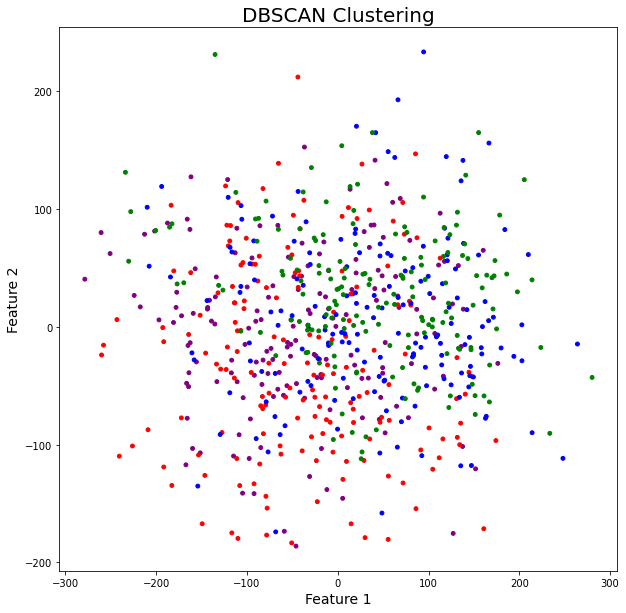

In [ ]:
import matplotlib
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(x_pca[0],x_pca[1],c=Labels,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
sc = silhouette_score(x_pca, labels)
print(f"silhouette_score :{sc}")
print(f"fowlkes_mallows_score :{fowlkes_mallows_score(labels, y)}")

silhouette_score :-0.06181263159479553
fowlkes_mallows_score :0.0


• Agglomerative clustering (i.e., hierarchical clustering) - use sklearn.cluster.AgglomerativeClustering
with number of clusters set to 4<br>
(a) Single link (MIN), (0.5 point)<br>
(b) Complete link (MAX), (0.5 point)<br>
(c) Group Average, and (0.5 point)<br>
(d) Ward’s method (0.5 point)<br>
Use the four linkage values ‘ward’, ‘complete’, ‘average’, ‘single’ for sklearn.cluster.
AgglomerativeClustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering
linkage=['ward', 'complete', 'average', 'single']

In [ ]:
for link in linkage:
    model = AgglomerativeClustering(n_clusters=4, linkage=link)
    model.fit(x_pca)
    y = model.fit_predict(x_pca)
    #evaluation metrics
    sc = silhouette_score(x_pca, model.labels_)
    print(f"\nSilhouette Coefficient for {link} linkage: {sc}")
    print(f"fowlkes_mallows_scorefor {link} linkage:{fowlkes_mallows_score(labels, y)}")



Silhouette Coefficient for ward linkage: 0.28842173741610494
fowlkes_mallows_scorefor ward linkage:0.2933342841070507

Silhouette Coefficient for complete linkage: 0.2214524799412319
fowlkes_mallows_scorefor complete linkage:0.3377309159575102

Silhouette Coefficient for average linkage: 0.1888161164653082
fowlkes_mallows_scorefor average linkage:0.3796715115075189

Silhouette Coefficient for single linkage: 0.26345055314596894
fowlkes_mallows_scorefor single linkage:0.49885419678086873


4. (Clustering Evaluations) For all the methods in Item 3:<br>
(a) Perform clustering performance evaluation using Fowlkes-Mallows index (sklearn.metrics.fowlkes
mallows score). Compute the Fowlkes-Mallows index for each method on the 2D dataset. (0.5
point)<br>

KMeans random      - 0.292227777070153<br>
KMeans k-means++   - 0.28971686585713274<br>
BisectingKMeans    - 0.2840247505097351<br>
SpectralClustering - 0.4594782488450516<br>
DBScan - 0.0<br>
Agglomerative Clustering with ward linkage - 0.2933342841070507<br>
Agglomerative Clustering with complete linkage - 0.3377309159575102<br>
Agglomerative Clustering with average linkage - 0.3796715115075189<br>
Agglomerative Clustering with single linkage - 0.49885419678086873<br>
<br>
(b) Perform clustering performance evaluation using Silhouette Coefficient (sklearn.metrics.silhouette score).
Compute the Silhouette Coefficient for each method. (0.5 point)<br><br>

KMeans random      - 0.06839236313754889<br>
KMeans k-means++   - 0.06970348281927917<br>
BisectingKMeans    - 0.058927093194645216<br>
SpectralClustering - -0.037430750569968675<br>
DBScan - -0.06181263159479553<br>
Agglomerative Clustering with ward linkage - 0.28842173741610494<br>
Agglomerative Clustering with complete linkage - 0.2214524799412319<br>
Agglomerative Clustering with average linkage - 0.1888161164653082<br>
Agglomerative Clustering with single linkage - 0.26345055314596894<br>
<br>
(c) Rank the methods from the best to the worst for our dataset based on Fowlkes-Mallows index.
(0.5 point)<br><br>
Rank 1 - Agglomerative Clustering with single linkage<br>
Rank 2 - SpectralClustering<br>
Rank 3 - Agglomerative Clustering with average linkage<br>
Rank 4 - Agglomerative Clustering with complete linkage<br>
Rank 5 - Agglomerative Clustering with ward linkage<br>
Rank 6 - KMeans random<br>
Rank 7 - KMeans k-means++<br>
Rank 8 - BisectingKMeans<br>
Rank 9 - DBScan<br>

<br>
(d) Rank the methods from the best to the worst for our dataset based on Silhouette Coefficient.
(0.5 point)<br>

Rank 1 - Agglomerative Clustering with ward linkage<br>
Rank 2 - Agglomerative Clustering with single linkage<br>
Rank 3 - Agglomerative Clustering with complete linkage<br>
Rank 4 - Agglomerative Clustering with average linkage<br>
Rank 5 - KMeans k-means++<br>
Rank 6 - KMeans random<br>
Rank 7 - BisectingKMeans<br>
Rank 8 - SpectralClustering<br>
Rank 9 - DBScan<br>